# Bibliotecas

In [1]:
# Data Manipulation
import pandas as pd
import json
import os
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
sns.set_palette("dark")
sns.set_style("whitegrid")

In [2]:
def correlation_matrix(correlation_matrix, ax = None, vmin = -1, vmax = 1):
    '''
    Description:
        - Plots a cool correlation matrix, based on seaborn heatmap
    Arguments:
        - Correlation Matrix Dataset (Ex: "df.corr()")
    '''
    
    # Creates a triangular shaped mask based on the original matrix
    tri_mask = np.triu(np.ones_like(correlation_matrix))

    # Plot the triangular heat map
    sns.heatmap(
        data = correlation_matrix,
        mask = tri_mask,
        annot = True,
        cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True),
        ax = ax,
        vmin = vmin,
        vmax = vmax
    )

# Import dos dados e limpeza 

In [3]:
root_folder = r'J:\Estudo\Projetos\VoiceToInsight\data\json_results'

dataframes = []
for file in os.listdir(root_folder):
    try:
        with open(os.path.join(root_folder, file), 'r', encoding = "utf8") as f:
            dfa = pd.json_normalize(json.load(f))
            dataframes.append(dfa)
    except Exception as e:
        print(f'erro no arquivo: {file}')
        print(e)

In [4]:
df = pd.concat(dataframes)
df.head()

,empresa,atendimento,nps_atendimento,nps_suporte_tecnico,nps_comercial_financeiro,nps_recomendacao,nps_satisfacao,nps_custo,nps_unidade,nps_rh,nps_outros
0,Escandinávia Veículos,Sim,10,9,9,,,8,10,,
0,Complexo Brasil,Sim,6,6,,10,9,,7,,
0,Anapol e Consuprim Empresarial,Sim,,10,7,9,,9,7,,8
0,Baterias Crawl,Sim,8,8,,8,,8,7,,6
0,Núcleo Y Participações da LTDA,Sim,,,,0,,,,,


In [5]:
# Deixando os valores das colunas de NPS como numérico
for column in df.columns:
    if column not in ['empresa', 'atendimento']:
        df[column] = df[column].apply(lambda x: float(x.replace(',', '.').strip()) if x != '' else None)

In [6]:
df.head()

,empresa,atendimento,nps_atendimento,nps_suporte_tecnico,nps_comercial_financeiro,nps_recomendacao,nps_satisfacao,nps_custo,nps_unidade,nps_rh,nps_outros
0,Escandinávia Veículos,Sim,10.0,9.0,9.0,NaN,NaN,8.0,10.0,NaN,NaN
0,Complexo Brasil,Sim,6.0,6.0,NaN,10.0,9.0,NaN,7.0,NaN,NaN
0,Anapol e Consuprim Empresarial,Sim,NaN,10.0,7.0,9.0,NaN,9.0,7.0,NaN,8.0
0,Baterias Crawl,Sim,8.0,8.0,NaN,8.0,NaN,8.0,7.0,NaN,6.0
0,Núcleo Y Participações da LTDA,Sim,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [7]:
# Criando uma coluna de NPS geral
df['nps_geral'] = df[[coluna for coluna in df.columns if 'nps' in coluna]].mean(axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 0
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   empresa                   80 non-null     object 
 1   atendimento               80 non-null     object 
 2   nps_atendimento           47 non-null     float64
 3   nps_suporte_tecnico       44 non-null     float64
 4   nps_comercial_financeiro  32 non-null     float64
 5   nps_recomendacao          38 non-null     float64
 6   nps_satisfacao            24 non-null     float64
 7   nps_custo                 37 non-null     float64
 8   nps_unidade               37 non-null     float64
 9   nps_rh                    1 non-null      float64
 10  nps_outros                4 non-null      float64
 11  nps_geral                 53 non-null     float64
dtypes: float64(10), object(2)
memory usage: 8.1+ KB


In [9]:
df.reset_index(inplace = True, drop = True)

# Análise Exploratória

## Overall metrics

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
nps_atendimento,47.0,8.063830,2.446419,0.0,7.000,9.000000,10.0,10.0
nps_suporte_tecnico,44.0,7.732955,2.243464,0.0,7.375,8.000000,9.0,10.0
nps_comercial_financeiro,32.0,8.562500,1.485141,5.0,8.000,9.000000,10.0,10.0
nps_recomendacao,38.0,8.026316,2.926919,0.0,7.250,9.000000,10.0,10.0
nps_satisfacao,24.0,8.208333,2.283764,0.0,7.750,9.000000,10.0,10.0
nps_custo,37.0,7.216216,2.286860,0.0,7.000,8.000000,9.0,10.0
nps_unidade,37.0,8.810811,1.265742,6.0,8.000,9.000000,10.0,10.0
nps_rh,1.0,8.000000,NaN,8.0,8.000,8.000000,8.0,8.0
nps_outros,4.0,7.250000,0.957427,6.0,6.750,7.500000,8.0,8.0
nps_geral,53.0,7.883423,1.796165,0.0,7.500,8.214286,9.0,10.0


<Figure size 1000x1000 with 0 Axes>

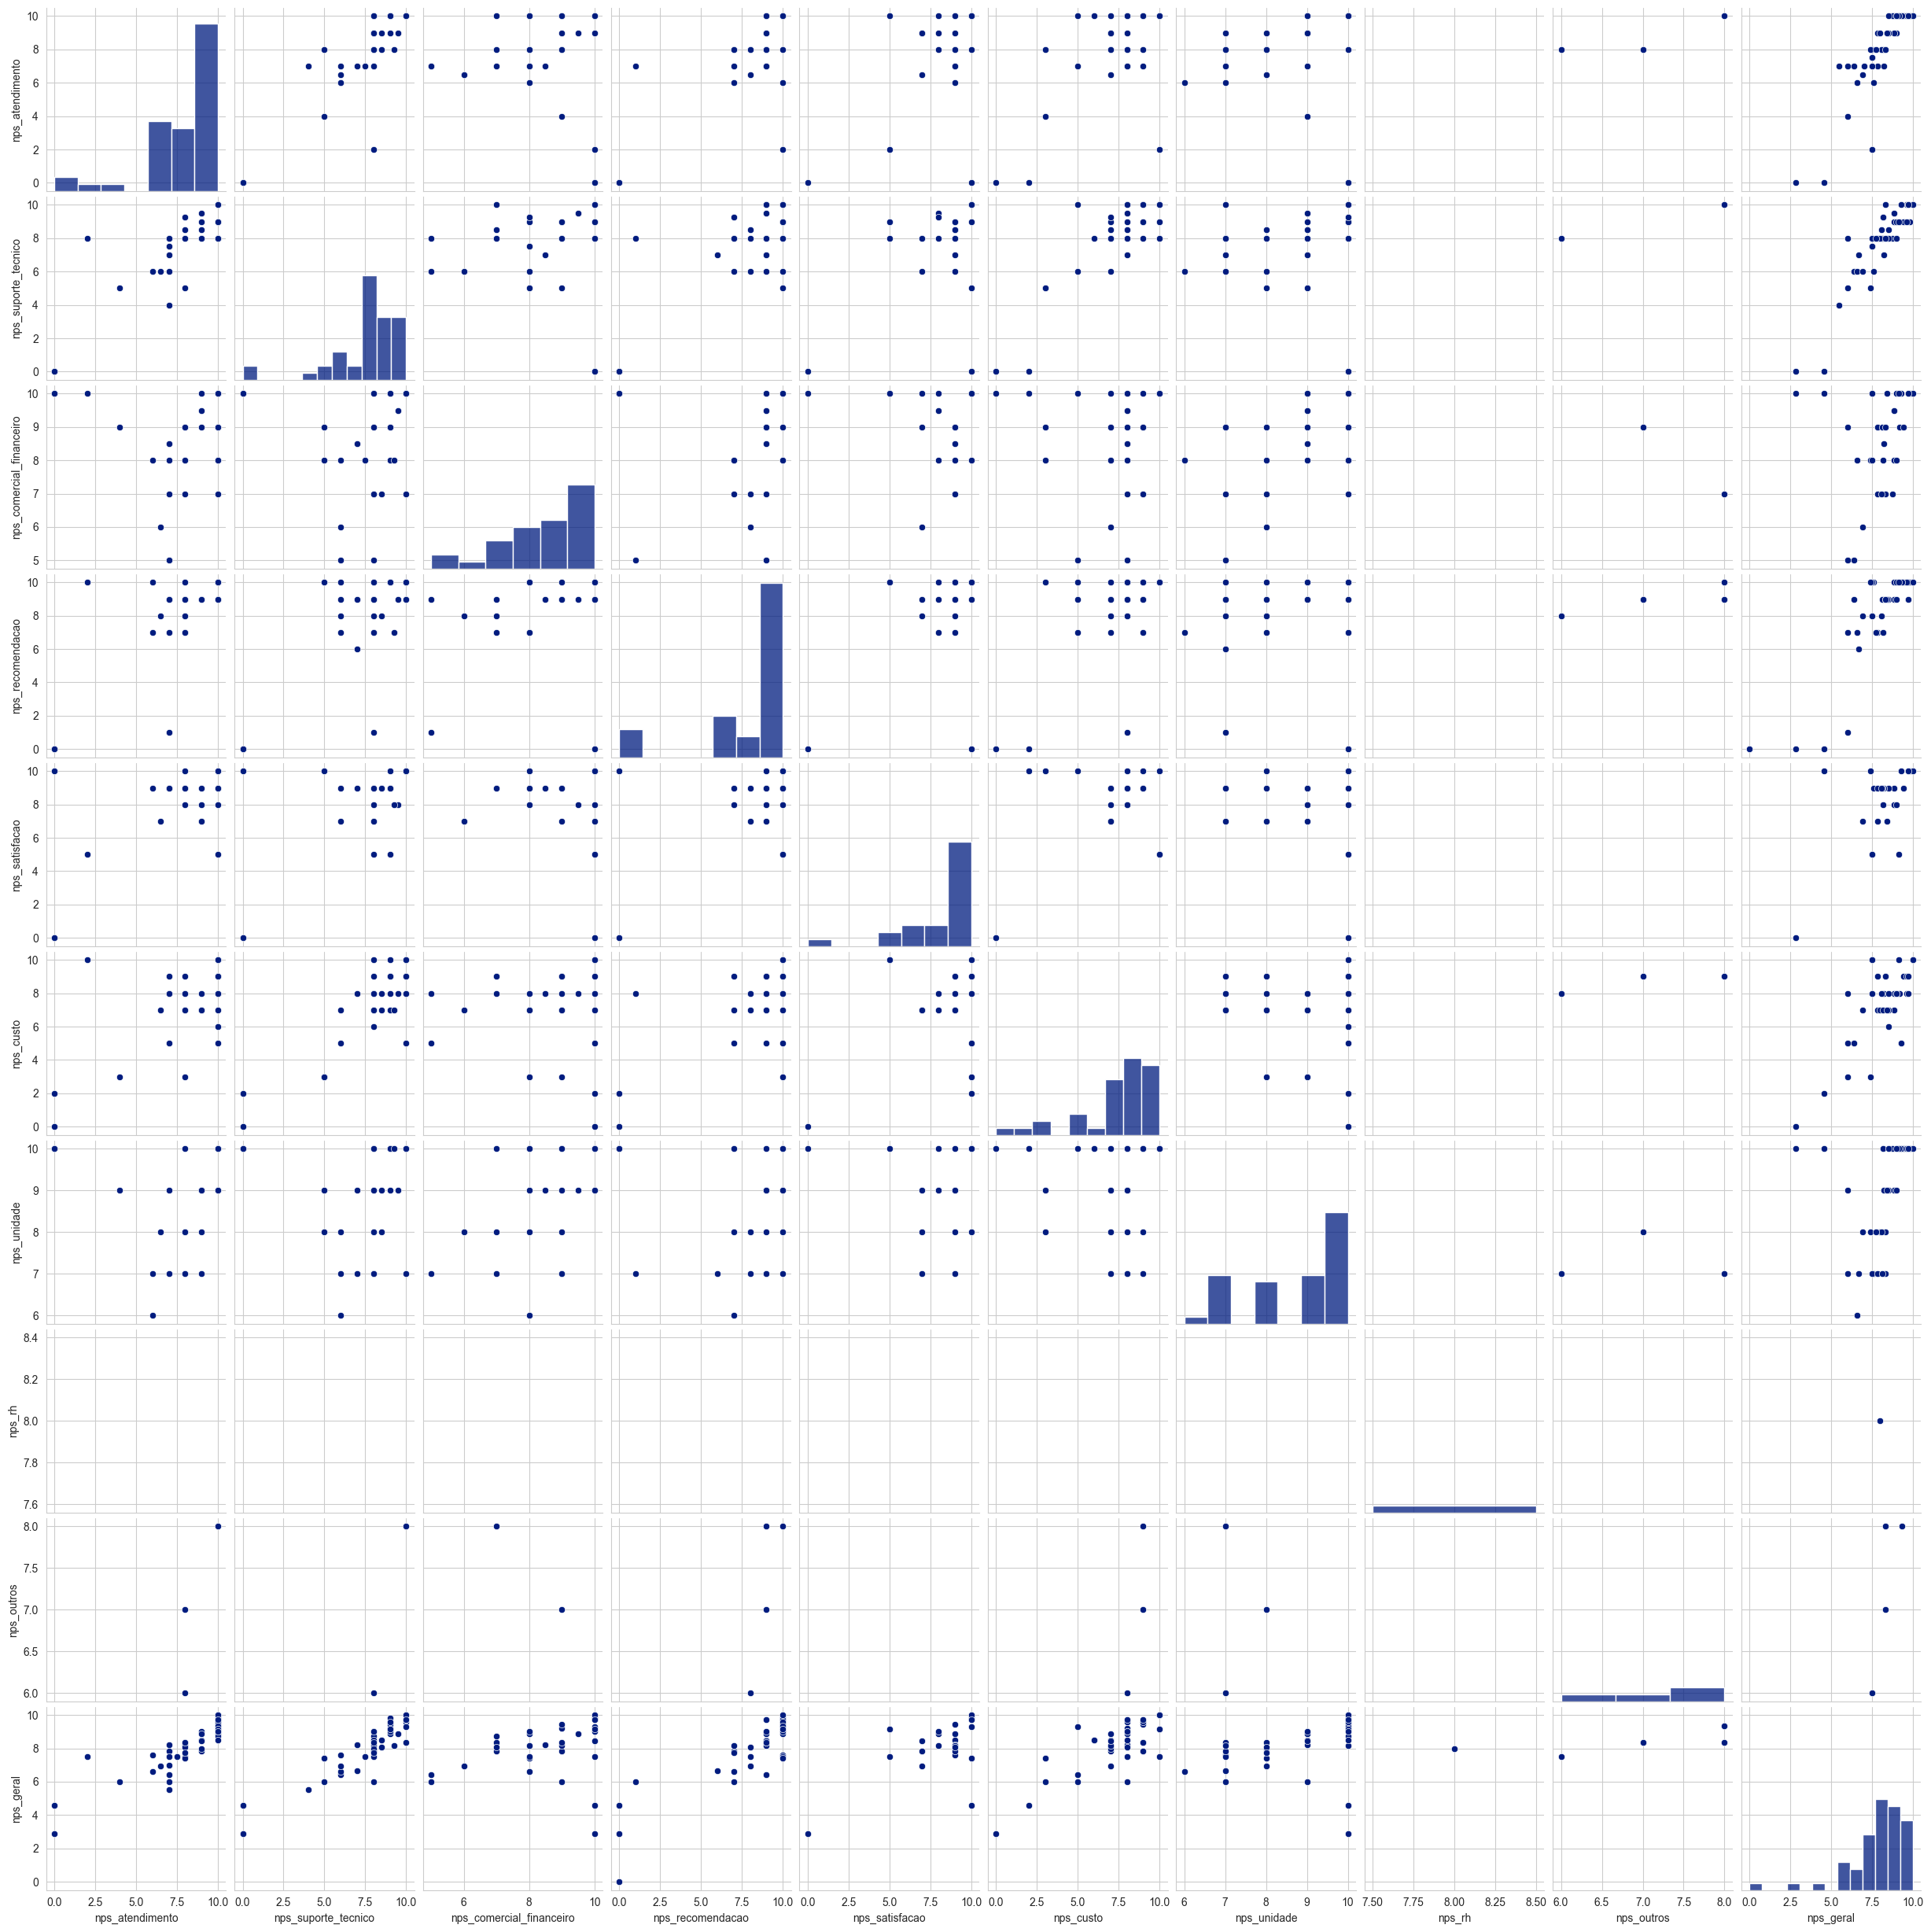

In [11]:
plt.figure(figsize = (10, 10))
sns.pairplot(
    df[[coluna for coluna in df.columns if 'nps' in coluna]]
)
plt.show()

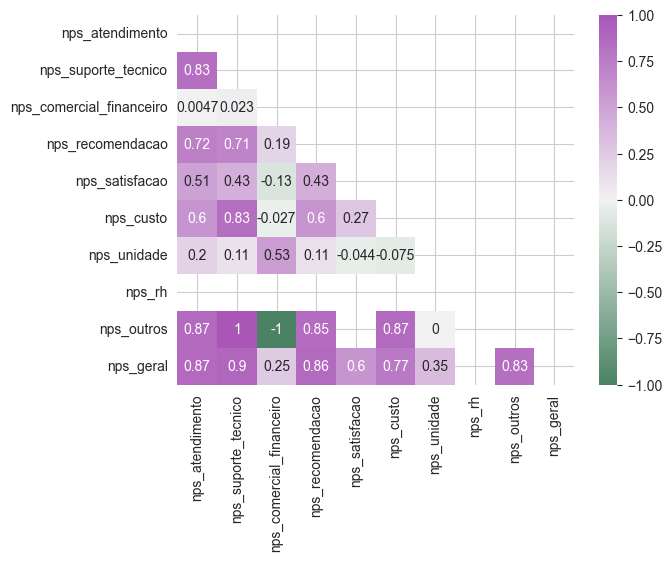

In [12]:
correlation_matrix(
    df[[coluna for coluna in df.columns if 'nps' in coluna]].corr()
)

## Metricas por empresa e atendimento

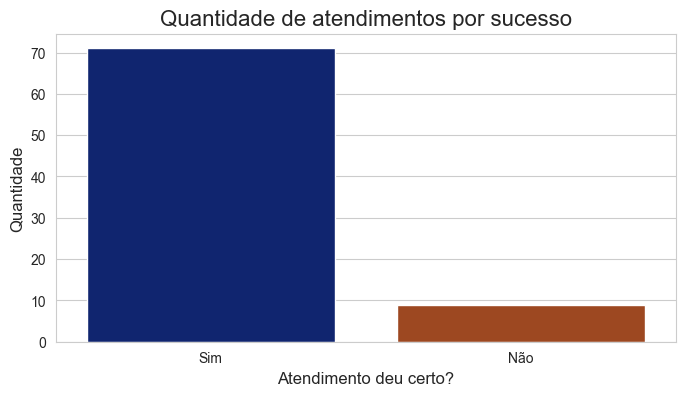

In [13]:
plt.figure(figsize = (8, 4))
sns.countplot(
    x = 'atendimento',
    hue = 'atendimento',
    data = df
)
plt.title('Quantidade de atendimentos por sucesso', fontsize = 16)
plt.ylabel('Quantidade', fontsize = 12)
plt.xlabel('Atendimento deu certo?', fontsize = 12)
plt.show()

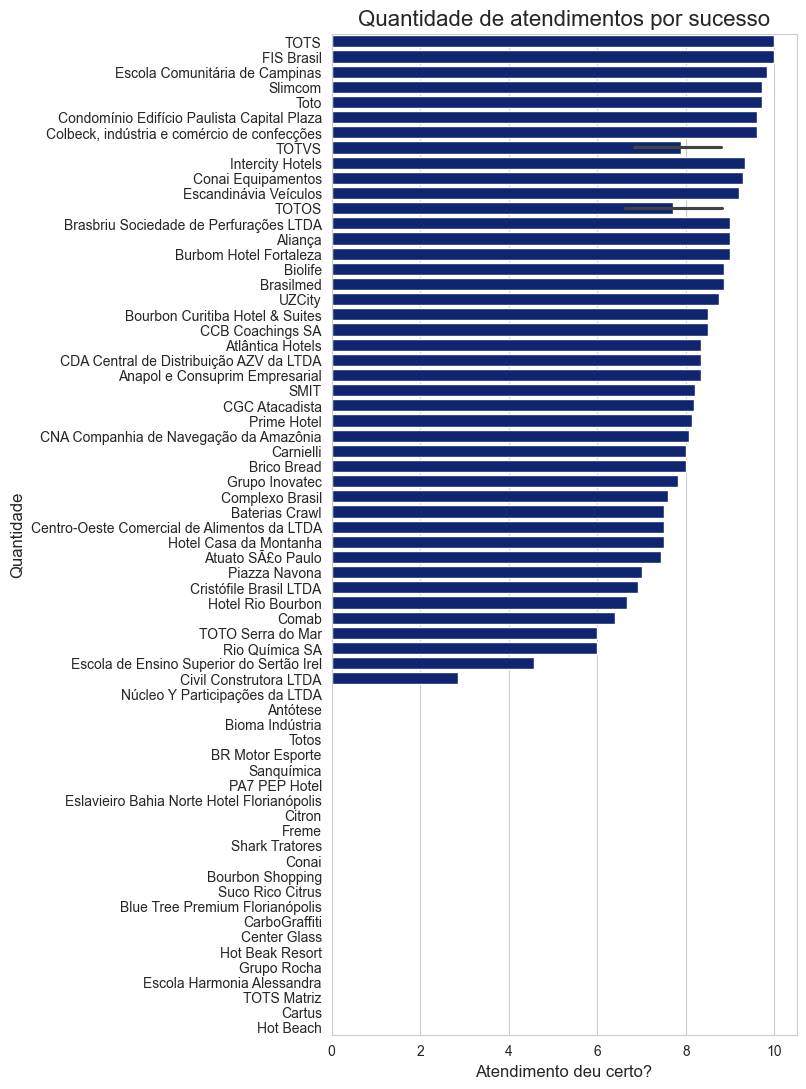

In [14]:
plt.figure(figsize = (6, 13))
sns.barplot(
    x = 'nps_geral',
    y = 'empresa',
    data = df.sort_values(by = 'nps_geral', ascending = False)
)
plt.title('Quantidade de atendimentos por sucesso', fontsize = 16)
plt.ylabel('Quantidade', fontsize = 12)
plt.xlabel('Atendimento deu certo?', fontsize = 12)
plt.show()

## Detratores, Neutros e Promotores

In [15]:
df['status'] = pd.cut(
    x = df['nps_geral'],
    bins = [0, 6, 8, 10],
    labels = ['Detrator', 'Neutro', 'Promotor'],
    include_lowest = True
)
df.head()

,empresa,atendimento,nps_atendimento,nps_suporte_tecnico,nps_comercial_financeiro,nps_recomendacao,nps_satisfacao,nps_custo,nps_unidade,nps_rh,nps_outros,nps_geral,status
0,Escandinávia Veículos,Sim,10.0,9.0,9.0,NaN,NaN,8.0,10.0,NaN,NaN,9.200000,Promotor
1,Complexo Brasil,Sim,6.0,6.0,NaN,10.0,9.0,NaN,7.0,NaN,NaN,7.600000,Neutro
2,Anapol e Consuprim Empresarial,Sim,NaN,10.0,7.0,9.0,NaN,9.0,7.0,NaN,8.0,8.333333,Promotor
3,Baterias Crawl,Sim,8.0,8.0,NaN,8.0,NaN,8.0,7.0,NaN,6.0,7.500000,Neutro
4,Núcleo Y Participações da LTDA,Sim,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,Detrator


In [16]:
df.to_csv(r'J:\Estudo\Projetos\VoiceToInsight\data\nps_data.csv', index = False)

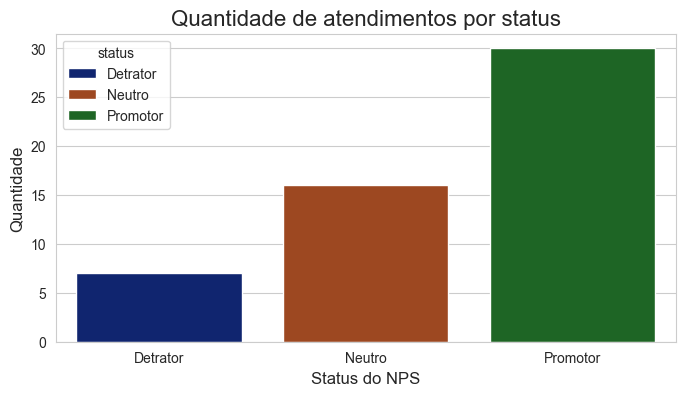

In [17]:
plt.figure(figsize = (8, 4))
sns.countplot(
    x = 'status',
    hue = 'status',
    data = df
)
plt.title('Quantidade de atendimentos por status', fontsize = 16)
plt.ylabel('Quantidade', fontsize = 12)
plt.xlabel('Status do NPS', fontsize = 12)
plt.show()

In [18]:
pd.DataFrame(df['status'].value_counts()).reset_index()

,status,count
0,Promotor,30
1,Neutro,16
2,Detrator,7
